This notebook begins by generating some simple summary statistics for the dataset. We consider the distribution of reviews over the whole set, as well as the most frequently reviewed authors.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Let's begin with some simple descriptive statistics of the data. First, let's load in the book review count data and get a sense of how many reviews were published by each of our respective magazines.

In [2]:
df = pd.read_csv('../data/processed/book_reviews.tsv', sep='\t', index_col=0)
df.head()

,AB Bookman's Weekly,Publishers Weekly,Esquire,Booklist,Journal of Aesthetics and Art Criticism,International Philosophical Quarterly,Journal of Marketing,Harvard Law Review,Journal of Business Education,Journal of Home Economics,...,Black Warrior Review,Computers and the Humanities,American Arts,Essays on Canadian Writing`,Performing Arts Review,"Journal of Arts Management, Law, and Society","Studio International, Review",Journal of Black Studies,Lone Star Review,Aspen Journal of the Arts
"Classics In The Kitchen || AABERG, Jean",2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"The Complete Book Of Knitting || ABBEY, Barbara",1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"A Locomotive Engineer's Album || ABDILL, George B",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"House Of India Cookbook || ABDULLAH, Syed",1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"The Rockefeller Billions: World's Most Stupendous Fortune || ABELS, Jules",1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have almost 500 journals tracked by the data in this period, but most of them reviewed a comparatively small number of books. Let's sum up the column row and column totals to get a sense of the distribution.

In [3]:
journal_total = df.sum(axis=0)
book_total = df.sum(axis=1)

The distribution of reviews is highly uneven. The overwhelming majority of books were reviewed by only a handful of publications. In part, this is because the Book Review Index tracks highly-specialized publications targeted at very specific audiences, such as specific academic subfields.

Here are some numbers and visualizations that give you a sense of how lopsided it is. Note that the histogram is log-scaled.

In [4]:
only_one_review = len(book_total[book_total==1])
print(f'Out of {len(df)} books, {only_one_review} received only a single review.')

Out of 326774 books, 151468 received only a single review.


In [5]:
book_total.describe()

count    326774.000000
mean          2.962546
std           3.360021
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          63.000000
dtype: float64

In [6]:
book_total.median()

2.0

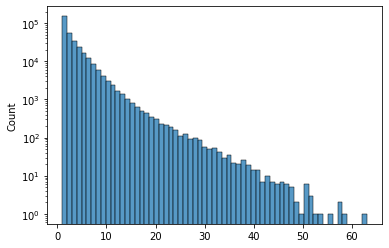

In [7]:
review_count_hist = sns.histplot(book_total, log_scale=(False, True), bins=book_total.max())
plt.show()

It's actually kind of remarkable how clearly the resulting histogram follows a power law (the Y axis is on a log scale). 

Just for fun, let's look at which titles are hiding in the tail end of that distribution, with 50 or more reviews.

In [8]:
book_total.sort_values(ascending=False)[:10]

The Fate Of The Earth || SCHELL, Jonathan                     63
Robert Kennedy And His Times || SCHLESINGER, Arthur M, Jr.    59
Sophie's Choice || STYRON, William                            58
The White Hotel || THOMAS, D M                                58
The Dean's December || BELLOW, Saul                           56
Ernest Hemingway: A Life Story || BAKER, Carlos               54
Humboldt's Gift || BELLOW, Saul                               53
The Coup || UPDIKE, John                                      52
George Orwell: A Life Am || CRICK, Bernard                    52
Ragtime || DOCTOROW, EL                                       52
dtype: int64

The single most-reviewed book in this segment of our data is The Fate of the Earth, by Jonathan Schell, a manifesto about nuclear disarmament. But the rest of the top 10 does include some big works of fiction from the period: Doctorow's Ragtime, Styron's Sophie's Choice, and two by Saul Bellow.

Journals are also pretty lopsided. A few journals publish a huge number of reviews while others only publish a handful.

In [9]:
journal_total.sort_values(ascending=False)[:10]

Library Journal               81277
Booklist                      63548
Kirkus Reviews                56212
Publishers Weekly             56014
Times Literary Supplement     51025
New York Times Book Review    31967
Best Sellers                  20661
Observer (London)             17538
Book World                    16693
School Library Journal        15886
dtype: int64

In [10]:
journal_total.sort_values(ascending=False)[250:260]

Archaeology                    339
Money                          339
Come-All-Ye                    326
Cresset                        325
National Civic Review          322
Emergency Librarian            316
Dance Magazine                 313
Book Collector                 312
Ecumenical Review              296
Western American Literature    296
dtype: int64

In [11]:
journal_total.sort_values(ascending=True)[:10]

Lone Star Review                                        1
Journal of Black Studies                                1
World                                                   1
Dun's Business Month                                    1
Journal of Arts Management, Law, and Society            1
International Journal of Aging and Human Development    1
Sports Illustrated                                      1
Performing Arts Review                                  1
Essays on Canadian Writing`                             1
Simulation                                              2
dtype: int64

Here's something interesting. If you plot the histogram for total reviews of each journal, but use a log-scale on the X-axis, you get a nice bell curve. In other words, it seems like the typical journal in this dataset published between 100 and 1000 book reviews between 1965-1984. The median is 372. 

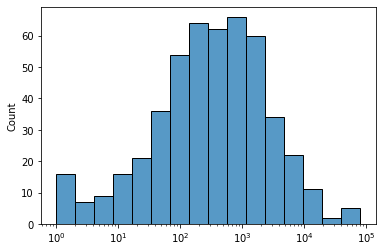

In [12]:
review_count_hist = sns.histplot(journal_total, log_scale=(True, False))
plt.show()

In [13]:
journal_total.median()

372.0

In [14]:
journal_total.describe()

count      485.000000
mean      1996.047423
std       6849.379854
min          1.000000
25%         81.000000
50%        372.000000
75%       1348.000000
max      81277.000000
dtype: float64

Now we'll switch gears a bit and look at the same numbers, except totaled over authors. Now, each row represents an individual author — all reviews they received in this period. Note that due to OCR errors there may be a few authors who were repeated and a small handful who are unnamed.

We'll drop the missing authors, as well as count up the total books for each author, which will be useful later.

In [15]:
df['author_name'] = df.index.to_series().str.split('\\|\\|').str[1].str.strip()
author_total_books = df['author_name'].value_counts()
df = df.groupby('author_name').sum()
df = df[df.index.notnull()]
df = df.drop('#NAME?')
df.head()

,AB Bookman's Weekly,Publishers Weekly,Esquire,Booklist,Journal of Aesthetics and Art Criticism,International Philosophical Quarterly,Journal of Marketing,Harvard Law Review,Journal of Business Education,Journal of Home Economics,...,Black Warrior Review,Computers and the Humanities,American Arts,Essays on Canadian Writing`,Performing Arts Review,"Journal of Arts Management, Law, and Society","Studio International, Review",Journal of Black Studies,Lone Star Review,Aspen Journal of the Arts
author_name,,,,,,,,,,,,,,,,,,,,,
,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"AABERG, Jean",2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"AADLAND, Florence",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"AAFJES, Bertus",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"AAGAARD, Orlena",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
author_total = df.sum(axis=1)

As we can see, the story about the distribution of reviews looks similar, even when we are considering authors as our basic unit. 

In [17]:
only_one_review = len(author_total[author_total==1])
print(f'Out of {len(df)} authors, {only_one_review} received only a single review.')

Out of 167445 authors, 67791 received only a single review.


In [18]:
author_total.describe()

count    167445.000000
mean          5.781480
std          14.820817
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        1227.000000
dtype: float64

In [19]:
author_total.median()

2.0

The biggest difference is that it's even harder to get a neat histogram of review counts, since there are a few outlying authors who were just reviewed way more frequently than anybody else. This is both because they were widely reviewed and because they were just much more prolific (thus having more opportunities for review), as we will see in a moment.

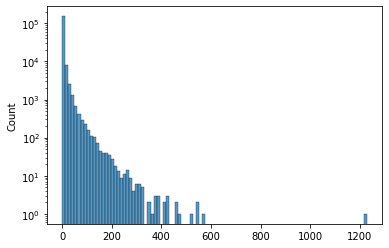

In [20]:
review_count_hist = sns.histplot(author_total, log_scale=(False, True), bins=100)
plt.show()

Here are the 20 most frequently reviewed authors in the data for 1965-1984.

In [23]:
author_total.sort_values(ascending=False)[:20]

author_name
ASIMOV, Isaac                   1227
SIMENON, Georges                 566
SINGER, Isaac Bashevis           552
SILVERBERG, Robert               542
UPDIKE, John                     518
OATES, Joyce Carol               477
SOLZHENITSYN, Aleksandr          466
CREASEY, John                    465
DE PAOLA, Tomie                  426
MAILER, Norman                   420
NABOKOV, Vladimir                420
THEROUX, Paul                    417
WILSON, John Anthony Burgess     411
MURDOCH, Iris                    391
ROCKWELL, Anne                   389
VIDAL, Gore                      386
YOLEN, Jane                      376
SIMON, Seymour                   374
AIKEN, Joan                      370
LESSING, Doris                   359
dtype: int64

Isaac Asimov is a universe apart from everybody else - he has more than *twice* as many reviews as the next closest author! This is, to me at least, a surprising result that doesn't fit neatly into received wisdom about literary importance or influence in this period.

That being said, Asimov's importance in this data is due in part to two things: for one, he was very prolific. He simply has more books in the data than anybody else. You can see this below, which is a list of the authors with the most titles in the data.

In [24]:
author_total_books.sort_values(ascending=False)[:20]

ASIMOV, Isaac               250
CREASEY, John               163
SILVERBERG, Robert          147
SHAKESPEARE, William        131
SIMENON, Georges            119
CARPENTER, Allan             99
SCHULZ, Charles M            93
ANDERSEN, Hans Christian     88
CONGRESSIONAL Quarterly      87
COHEN, Daniel                86
SIMON, Seymour               83
MOORE, Patrick               82
KRAMER, Jack                 81
MAY, Julian                  78
QUEEN, Ellery                72
WODEHOUSE, P G               72
WAHL, Jan                    72
DICKENS, Charles             72
SULLIVAN, George             71
TIME-UFE Books               71
Name: author_name, dtype: int64

Some things to note, here. Notice the preponderance of authors who did not even live during the time period covered by the data: Shakespeare, Dickens, Hans Christian Andersen. These authors continued to be reprinted throughout the twentieth century, and editions of their books continued to be reviewed. 

Notice as well that some of these authors are not individual people. "TIME-UFE Books" is an OCR error for "Time Life Books," a book series by Time.

But back to Asimov, for a moment. Another reason he takes the top spot in our data is because of how many different kinds of magazines considered him interesting. Here is a list of every journal for which he is #1.

In [25]:
for col in df.columns:
    if df[col].idxmax() == 'ASIMOV, Isaac':
        print(col, df[col].max())

Publishers Weekly 107
Booklist 142
Library Journal 131
Kirkus Reviews 131
Catholic Library World 19
Book World 37
Voice of Youth Advocates 29
Science Books and Films 58
Los Angeles Times Book Review 9
Nature 7
Science Fiction and Fantasy Book Review 18
Science Fiction Review 15


In other words, Asimov's work "casts a wide net," so to speak. He gets coverage in mainstream journals, the industry press, children's magazines, science fiction journals, and even academic journals.

Who else has this quality, of being reviewed in many *different* journals? Let's sort authors by the number of distinct journals they appear in and see who bubbles up.

In [27]:
# we can treat each count as 1 just by casting the whole dataframe to bool
df.astype(bool).sum(axis=1).sort_values(ascending=False)[:20]

author_name
ASIMOV, Isaac                   89
SINGER, Isaac Bashevis          81
WILSON, John Anthony Burgess    79
COLES, Robert                   78
BETTELHEIM, Bruno               77
SCHLESINGER, Arthur M, Jr.      76
NISBET, Robert                  73
CLARK, Ronald W                 72
UPDIKE, John                    71
MURDOCH, Iris                   71
BELLOW, Saul                    71
MAILER, Norman                  69
NABOKOV, Vladimir               69
OATES, Joyce Carol              68
VIDAL, Gore                     68
SOLZHENITSYN, Aleksandr         68
BARZUN, Jacques                 67
ROTH, Philip                    67
DRABBLE, Margaret               67
UFTON, Robert Jay               66
dtype: int64

Note the appearance on this list of many of the same authors from our earlier list of total counts of reviews. In this data, at least, the best way to up one's review count seems to be getting reviewed in many outlets. This is intuitive, given that most journals will only publish a single review of a given title. 

These authors are all similar to each other in a single way: they are reviewed by many different magazines. A natural next question is to consider how their review profiles differ and overlap. We might imagine, for example, that psychiatrist Robert Jay Lifton ("UFTON" is another OCR error) is not being reviewed in exactly the same journals as novelist Iris Murdoch. They are both widely reviewed, but by different segments of the industry.

We could of course consider this on an ad hoc basis, by viewing the top authors in a specific journals. Here are the top authors for the New Yorker. 

In [30]:
df['New Yorker'].sort_values(ascending=False)[:10]

author_name
SIMENON, Georges          37
SINGER, Isaac Bashevis    13
LEAR, Edward              13
WOOLF, Virginia           10
BARING, Maurice           10
RICHARDSON, Joanna         9
DE VRIES, Peter            9
ROWSE, A L                 9
SYMONS, Julian             9
STEVENSON, James           8
Name: New Yorker, dtype: int64

This is quite different from the top authors for a religious magazine like Christian Century. Here, the top author is  Thomas Merton, a Trappist monk, theologian, and activist. 

In [32]:
df['Christian Century'].sort_values(ascending=False)[:10]

author_name
MERTON, Thomas         20
BERRIGAN, Daniel       19
MARTY, Martin E        18
BUECHNER, Frederick    17
KENNEDY, Eugene        17
RAHNER, Kari           16
MOLTMANN, Jurgen       16
ELLUL, Jacques         15
ALTIZER, Thomas J J    15
NOVAK, Michael         14
Name: Christian Century, dtype: int64

It further different when we consider an outlet for reviews of children's literature, such as the Children's Book Review Service.

In [33]:
df["Children's Book Review Service"].sort_values(ascending=False)[:10]

author_name
DE PAOLA, Tomie            22
SHARMAT, Marjorie W        22
BUNTING, Eve               15
DELTON, Judy               14
ADLER, C S                 13
PINKWATER, Daniel Manus    13
COHEN, Barbara             12
ROCKWELL, Anne             12
YOLEN, Jane                12
ASCH, Frank                12
Name: Children's Book Review Service, dtype: int64

... and so on. There are over 450 journals in this dataset, so we could continue to do this all day. We would probably continue to find interesting tidbits of information about the reception history of American letters. But it would be better (obviously) if we had some way of considering the dataset as a whole.

We consider some ways to do that in the next notebook.